# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.7.3-alpha.new.202.203.206'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Dominica', 'Fiji', 'Papua New Guinea', 'Namibia', 'Bahamas']

,
 

3

: 

['Mauritius', 'Gambia', 'Seychelles', 'Lesotho', 'Brunei', 'Tanzania']

,
 

4

: 

[

'Zambia'

, 

'Guatemala'

, 

'Yemen'

, 

'Iceland'

, 

'Kyrgyzstan'

, 

'New Zealand'

,
     

'Suriname'

, 

'Venezuela'

, 

'Eritrea'

, 

'Antigua and Barbuda'

, 

'Belize'

,
     

'Montenegro'

, 

'Sao Tome and Principe'

, 

'Norway'

, 

'Ireland'

, 

'Zimbabwe'

,
     

'Central African Republic'

, 

'Grenada'

, 

'Palestine'

, 

'Trinidad and Tobago'

,
     

'Botswana'

, 

'Equatorial Guinea'

, 

'South Sudan'

, 

'Saint Lucia'

]

,
 

5

: 

[

'Australia'

, 

'Libya'

, 

'Madagascar'

, 

'Kenya'

, 

'Cambodia'

,
     

'Saint Vincent and the Grenadines'

, 

'Liechtenstein'

, 

'Spain'

, 

'Slovakia'

,
     

'Angola'

, 

'Vietnam'

, 

'Guyana'

, 

'Maldives'

, 

'Chad'

, 

'Comoros'

, 

'Benin'

,
     

'Costa Rica'

, 

'Swaziland'

, 

'Ethiopia'

, 

'Andorra'

, 

'Lebanon'

, 

'Kazakhstan'

,
     

'Mozambique'

, 

'Paraguay'

, 

'Malawi'

, 

'Syria'

, 

'Philippines'

, 

'Japan'

,
     

'Morocco'

, 

'Guinea-Bissau'

]

,
 

6

: 

[

'Bosnia and Herzegovina'

, 

'San Marino'

, 

'Taiwan'

, 

'Rwanda'

, 

'Argentina'

,
     

'Kosovo'

, 

'Croatia'

, 

'Bermuda'

, 

'Slovenia'

, 

'Cape Verde'

, 

'Burundi'

,
     

'Luxembourg'

, 

'Colombia'

, 

'Haiti'

, 

'Mauritania'

, 

'Uganda'

, 

'Congo'

,
     

'South Africa'

, 

'Mongolia'

, 

'Netherlands'

, 

'Somalia'

, 

'Bolivia'

, 

'Iraq'

,
     

'India'

, 

'Uzbekistan'

, 

'Afghanistan'

, 

'Tajikistan'

, 

'Israel'

, 

'Cuba'

,
     

'Ecuador'

, 

'Qatar'

, 

'Oman'

, 

'Niger'

, 

'Malta'

, 

'Sri Lanka'

]

,
 

7

: 

[

'Sudan'

, 

'Egypt'

, 

'Sierra Leone'

, 

'Ghana'

, 

'Nicaragua'

, 

'Switzerland'

,
     

'China'

, 

'Uruguay'

, 

'Pakistan'

, 

'Panama'

, 

'Dominican Republic'

, 

'Cameroon'

,
     

'Estonia'

, 

'Burkina Faso'

, 

'Nepal'

, 

'Greece'

, 

'Bhutan'

, 

'Armenia'

, 

'Chile'

,
     

'Bulgaria'

, 

'Albania'

, 

'Barbados'

, 

'Djibouti'

, 

'Thailand'

, 

'El Salvador'

,
     

'Germany'

, 

'Honduras'

, 

'Canada'

, 

'Cyprus'

, 

'Tunisia'

, 

'Azerbaijan'

,
     

'Belgium'

, 

'Monaco'

, 

'Finland'

, 

'Serbia'

, 

'Macedonia'

, 

'Algeria'

,
     

'Latvia'

]

,
 

8

: 

[

'United States'

, 

'Peru'

, 

'Myanmar'

, 

'Nigeria'

, 

'Indonesia'

, 

'Malaysia'

,
     

'Hungary'

, 

'Turkey'

, 

'Gabon'

, 

'Singapore'

, 

'Liberia'

, 

'Georgia'

,
     

'Lithuania'

, 

'Saudi Arabia'

, 

'Jordan'

, 

'Mexico'

, 

'Togo'

, 

'Belarus'

,
     

'Brazil'

, 

'Denmark'

]

,
 

9

: 

[

'Ukraine'

, 

'Austria'

, 

'Bangladesh'

, 

'Romania'

, 

'Italy'

, 

'Russia'

, 

'Kuwait'

,
     

'United Arab Emirates'

, 

'Bahrain'

, 

'Korea, South'

, 

'Portugal'

,
     

'Czech Republic'

, 

'Moldova'

, 

'Mali'

, 

'Jamaica'

, 

'France'

]

,
 

10

: 

['Senegal', 'Poland', 'Iran']

,
 

11

: 

['Guinea']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

20

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Ukraine'

, 

'Austria'

, 

'Bangladesh'

, 

'Romania'

, 

'Italy'

, 

'Russia'

, 

'Kuwait'

,
     

'United Arab Emirates'

, 

'Bahrain'

, 

'Korea, South'

, 

'Portugal'

,
     

'Czech Republic'

, 

'Moldova'

, 

'Mali'

, 

'Jamaica'

, 

'France'

]

,
 

10

: 

['Senegal', 'Poland', 'Iran']

,
 

11

: 

['Guinea']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Guinea  1st    Past  02May2020  11May2020    12414318
        2nd    Past  12May2020  20May2020    12414318
        3rd    Past  21May2020  28May2020    12414318
        4th    Past  29May2020  09Jun2020    12414318
        5th    Past  10Jun2020  17Jun2020    12414318
        6th    Past  18Jun2020  02Jul2020    12414318
        7th    Past  03Jul2020  14Jul2020    12414318
        8th    Past  15Jul2020  23Jul2020    12414318
        9th    Past  24Jul2020  03Aug2020    12414318
        10th   Past  04Aug2020  12Aug2020    12414318
        11th   Past  13Aug2020  24Aug2020    12414318

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	GIN,  7th phase (03Jul2020 - 14Jul2020): finished 1366 trials in 0 min 35 sec

	MLI,  5th phase (03Jun2020 - 14Jun2020): finished 2019 trials in 1 min  0 sec

	KOR,  9th phase (07Aug2020 - 24Aug2020): finished 2017 trials in 1 min  0 sec

	SEN, 10th phase (12Aug2020 - 24Aug2020): finished 2020 trials in 1 min  0 sec

	KWT,  6th phase (11Jul2020 - 21Jul2020): finished  481 trials in 0 min 10 sec

	KOR,  8th phase (22Jul2020 - 06Aug2020): finished 2025 trials in 1 min  0 sec

	MDA,  8th phase (08Aug2020 - 15Aug2020): finished  255 trials in 0 min  5 sec

	MLI,  2nd phase (03May2020 - 14May2020): finished 2008 trials in 1 min  0 sec

	UKR,  1st phase (07May2020 - 27May2020): finished 1994 trials in 1 min  0 sec

	JAM,  4th phase (09Jun2020 - 17Jun2020): finished  256 trials in 0 min  5 sec

	RUS,  9th phase (09Aug2020 - 24Aug2020): finished 2001 trials in 1 min  0 sec

	MLI,  8th phase (04Jul2020 - 20Jul2020): finished 2015 trials in 1 min  0 sec

	KOR,  6th phase (22Jun2020 - 05Jul2020): finished 2020 trials in 1 min  0 sec

	BHR,  4th phase (14Jun2020 - 21Jun2020): finished 2034 trials in 1 min  0 sec

	POL,  3rd phase (21May2020 - 03Jun2020): finished 2026 trials in 1 min  0 sec

	PRT,  4th phase (07Jun2020 - 17Jun2020): finished  475 trials in 0 min 10 sec

	PRT,  3rd phase (30May2020 - 06Jun2020): finished 1208 trials in 0 min 30 sec

	AUT,  7th phase (28Jul2020 - 06Aug2020): finished 2028 trials in 1 min  0 sec

	UKR,  7th phase (25Jul2020 - 01Aug2020): finished  257 trials in 0 min  5 sec

	KWT,  7th phase (22Jul2020 - 30Jul2020): finished  250 trials in 0 min  5 sec

	POL,  2nd phase (09May2020 - 20May2020): finished  459 trials in 0 min 10 sec

	MDA,  4th phase (25Jun2020 - 08Jul2020): finished 2005 trials in 1 min  0 sec

	GIN,  4th phase (29May2020 - 09Jun2020): finished 2025 trials in 1 min  0 sec

	BGD,  7th phase (24Jul2020 - 03Aug2020): finished 1045 trials in 0 min 25 sec

	BHR,  1st phase (06May2020 - 26May2020): finished 2011 trials in 1 min  0 sec

	JAM,  8th phase (21Jul2020 - 10Aug2020): finished 2016 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 2027 trials in 1 min  0 sec

	CZE,  5th phase (25Jun2020 - 17Jul2020): finished 2017 trials in 1 min  0 sec

	MLI,  7th phase (25Jun2020 - 03Jul2020): finished  478 trials in 0 min 10 sec

	PRT,  8th phase (22Jul2020 - 05Aug2020): finished  677 trials in 0 min 15 sec

	RUS,  8th phase (25Jul2020 - 08Aug2020): finished 2023 trials in 1 min  0 sec

	CZE,  6th phase (18Jul2020 - 26Jul2020): finished  227 trials in 0 min  5 sec

	GIN,  2nd phase (12May2020 - 20May2020): finished 2005 trials in 1 min  0 sec

	AUT,  1st phase (29Mar2020 - 06Apr2020): finished 2013 trials in 1 min  0 sec

	MLI,  1st phase (25Apr2020 - 02May2020): finished 2016 trials in 1 min  0 sec

	BGD,  9th phase (14Aug2020 - 24Aug2020): finished  254 trials in 0 min  5 sec

	BHR,  8th phase (27Jul2020 - 09Aug2020): finished  252 trials in 0 min  5 sec

	JAM,  6th phase (30Jun2020 - 08Jul2020): finished 2021 trials in 1 min  0 sec

	KWT,  4th phase (22Jun2020 - 30Jun2020): finished  481 trials in 0 min 10 sec

	JAM,  5th phase (18Jun2020 - 29Jun2020): finished 2016 trials in 1 min  0 sec

	SEN,  5th phase (19Jun2020 - 30Jun2020): finished  867 trials in 0 min 20 sec

	POL,  5th phase (16Jun2020 - 30Jun2020): finished  252 trials in 0 min  5 sec

	ARE,  7th phase (03Jul2020 - 12Jul2020): finished 2016 trials in 1 min  0 sec

	PRT,  5th phase (18Jun2020 - 27Jun2020): finished  480 trials in 0 min 10 sec

	MDA,  5th phase (09Jul2020 - 20Jul2020): finished  476 trials in 0 min 10 sec

	JAM,  1st phase (03May2020 - 20May2020): finished 2007 trials in 1 min  0 sec

	KOR,  2nd phase (25Mar2020 - 05Apr2020): finished 2010 trials in 1 min  0 sec

	ROU,  8th phase (01Aug2020 - 14Aug2020): finished  674 trials in 0 min 15 sec

	CZE,  8th phase (06Aug2020 - 13Aug2020): finished 1020 trials in 0 min 25 sec

	GIN,  1st phase (02May2020 - 11May2020): finished 2002 trials in 1 min  0 sec

	FRA,  7th phase (19Jun2020 - 09Jul2020): finished 1032 trials in 0 min 25 sec

	BGD,  4th phase (29Jun2020 - 06Jul2020): finished  858 trials in 0 min 20 sec

	ARE,  2nd phase (13May2020 - 25May2020): finished 2017 trials in 1 min  0 sec

	RUS,  2nd phase (23May2020 - 30May2020): finished 2013 trials in 1 min  0 sec

	RUS,  1st phase (08May2020 - 22May2020): finished 2007 trials in 1 min  0 sec

	ROU,  1st phase (16Apr2020 - 01May2020): finished 2010 trials in 1 min  0 sec

	UKR,  8th phase (02Aug2020 - 14Aug2020): finished 2007 trials in 1 min  0 sec

	IRN,  3rd phase (11May2020 - 28May2020): finished 1999 trials in 1 min  0 sec

	BGD,  6th phase (15Jul2020 - 23Jul2020): finished  259 trials in 0 min  5 sec

	AUT,  4th phase (14May2020 - 28Jun2020): finished  239 trials in 0 min  5 sec

	BGD,  8th phase (04Aug2020 - 13Aug2020): finished  254 trials in 0 min  5 sec

	AUT,  3rd phase (23Apr2020 - 13May2020): finished  246 trials in 0 min  5 sec

	ITA,  9th phase (22Jul2020 - 24Aug2020): finished 1984 trials in 1 min  0 sec

	IRN,  5th phase (11Jun2020 - 22Jun2020): finished  255 trials in 0 min  5 sec

	KWT,  8th phase (31Jul2020 - 10Aug2020): finished 1040 trials in 0 min 25 sec

	RUS,  7th phase (14Jul2020 - 24Jul2020): finished 1998 trials in 1 min  0 sec

	KWT,  1st phase (11May2020 - 24May2020): finished 1912 trials in 1 min  0 sec

	RUS,  5th phase (24Jun2020 - 03Jul2020): finished 1860 trials in 1 min  0 sec

	BHR,  3rd phase (05Jun2020 - 13Jun2020): finished 1842 trials in 1 min  0 sec

	GIN,  3rd phase (21May2020 - 28May2020): finished 1832 trials in 1 min  0 sec

	UKR,  5th phase (05Jul2020 - 15Jul2020): finished  453 trials in 0 min 10 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished 1004 trials in 0 min 25 sec

	FRA,  6th phase (28May2020 - 18Jun2020): finished 1505 trials in 0 min 45 sec

	ITA,  2nd phase (01Apr2020 - 12Apr2020): finished 1496 trials in 0 min 40 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished 1039 trials in 0 min 25 sec

	POL,  7th phase (16Jul2020 - 26Jul2020): finished  255 trials in 0 min  5 sec

	IRN,  2nd phase (16Apr2020 - 10May2020): finished  673 trials in 0 min 15 sec

	PRT,  9th phase (06Aug2020 - 24Aug2020): finished  244 trials in 0 min  5 sec

	KOR,  3rd phase (06Apr2020 - 06May2020): finished 1995 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 29May2020): finished 2016 trials in 1 min  0 sec

	UKR,  6th phase (16Jul2020 - 24Jul2020): finished  257 trials in 0 min  5 sec

	ARE,  3rd phase (26May2020 - 03Jun2020): finished 1036 trials in 0 min 25 sec

	CZE,  3rd phase (11May2020 - 02Jun2020): finished 2018 trials in 1 min  0 sec

	BGD,  2nd phase (11Jun2020 - 20Jun2020): finished 2028 trials in 1 min  0 sec

	ITA,  3rd phase (13Apr2020 - 20Apr2020): finished  248 trials in 0 min  5 sec

	KOR,  4th phase (07May2020 - 26May2020): finished  454 trials in 0 min 10 sec

	UKR,  4th phase (24Jun2020 - 04Jul2020): finished 2000 trials in 1 min  0 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished 2005 trials in 1 min  0 sec

	ITA,  4th phase (21Apr2020 - 01May2020): finished  253 trials in 0 min  5 sec

	BGD,  5th phase (07Jul2020 - 14Jul2020): finished 2012 trials in 1 min  0 sec

	KOR,  1st phase (15Mar2020 - 24Mar2020): finished 2012 trials in 1 min  0 sec

	PRT,  6th phase (28Jun2020 - 08Jul2020): finished  254 trials in 0 min  5 sec

	SEN,  7th phase (11Jul2020 - 20Jul2020): finished 2029 trials in 1 min  0 sec

	FRA,  5th phase (05May2020 - 27May2020): finished 2011 trials in 1 min  0 sec

	CZE,  1st phase (08Apr2020 - 19Apr2020): finished 1982 trials in 1 min  0 sec

	ITA,  1st phase (24Mar2020 - 31Mar2020): finished 1990 trials in 1 min  0 sec

	BHR,  5th phase (22Jun2020 - 07Jul2020): finished 1979 trials in 1 min  0 sec

	ROU,  4th phase (13Jun2020 - 30Jun2020): finished  673 trials in 0 min 15 sec

	IRN,  6th phase (23Jun2020 - 03Jul2020): finished  254 trials in 0 min  5 sec

	FRA,  8th phase (10Jul2020 - 30Jul2020): finished  468 trials in 0 min 10 sec

	MDA,  3rd phase (16Jun2020 - 24Jun2020): finished  476 trials in 0 min 10 sec

	ARE,  9th phase (27Jul2020 - 24Aug2020): finished 1949 trials in 1 min  0 sec

	IRN,  7th phase (04Jul2020 - 15Jul2020): finished  252 trials in 0 min  5 sec

	MLI,  9th phase (21Jul2020 - 24Aug2020): finished 1987 trials in 1 min  0 sec

	FRA,  9th phase (31Jul2020 - 24Aug2020): finished  656 trials in 0 min 15 sec

	SEN,  9th phase (30Jul2020 - 11Aug2020): finished  255 trials in 0 min  5 sec

	GIN, 11th phase (13Aug2020 - 24Aug2020): finished 2008 trials in 1 min  0 sec

	POL,  8th phase (27Jul2020 - 04Aug2020): finished  466 trials in 0 min 10 sec

	CZE,  2nd phase (20Apr2020 - 10May2020): finished 1028 trials in 0 min 25 sec

	RUS,  3rd phase (31May2020 - 13Jun2020): finished 1996 trials in 1 min  0 sec

	BGD,  1st phase (26May2020 - 10Jun2020): finished 2001 trials in 1 min  0 sec

	IRN,  1st phase (28Mar2020 - 15Apr2020): finished 1999 trials in 1 min  0 sec

	JAM,  3rd phase (29May2020 - 08Jun2020): finished 1172 trials in 0 min 30 sec

	SEN,  4th phase (10Jun2020 - 18Jun2020): finished 1035 trials in 0 min 25 sec

	GIN, 10th phase (04Aug2020 - 12Aug2020): finished 2014 trials in 1 min  0 sec

	KWT,  3rd phase (10Jun2020 - 21Jun2020): finished  476 trials in 0 min 10 sec

	CZE,  4th phase (03Jun2020 - 24Jun2020): finished 2014 trials in 1 min  0 sec

	PRT,  1st phase (05May2020 - 17May2020): finished 2029 trials in 1 min  0 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished  481 trials in 0 min 10 sec

	FRA,  4th phase (25Apr2020 - 04May2020): finished 2014 trials in 1 min  0 sec

	UKR,  9th phase (15Aug2020 - 24Aug2020): finished 2023 trials in 1 min  0 sec

	IRN,  8th phase (16Jul2020 - 28Jul2020): finished  243 trials in 0 min  5 sec

	MLI,  3rd phase (15May2020 - 24May2020): finished 2013 trials in 1 min  0 sec

	AUT,  8th phase (07Aug2020 - 15Aug2020): finished  258 trials in 0 min  5 sec

	IRN,  9th phase (29Jul2020 - 08Aug2020): finished  480 trials in 0 min 10 sec

	UKR,  2nd phase (28May2020 - 11Jun2020): finished 1995 trials in 1 min  0 sec

	IRN,  4th phase (29May2020 - 10Jun2020): finished 2010 trials in 1 min  0 sec

	ARE,  8th phase (13Jul2020 - 26Jul2020): finished 1032 trials in 0 min 25 sec

	AUT,  5th phase (29Jun2020 - 17Jul2020): finished 2014 trials in 1 min  0 sec

	ROU,  7th phase (24Jul2020 - 31Jul2020): finished  663 trials in 0 min 15 sec

	PRT,  7th phase (09Jul2020 - 21Jul2020): finished 2012 trials in 1 min  0 sec

	BGD,  3rd phase (21Jun2020 - 28Jun2020): finished 1197 trials in 0 min 30 sec

	SEN,  1st phase (30Apr2020 - 13May2020): finished 1999 trials in 1 min  0 sec

	MDA,  1st phase (13May2020 - 03Jun2020): finished 2004 trials in 1 min  0 sec

	CZE,  7th phase (27Jul2020 - 05Aug2020): finished 2000 trials in 1 min  0 sec

	KOR,  7th phase (06Jul2020 - 21Jul2020): finished  252 trials in 0 min  5 sec

	BHR,  2nd phase (27May2020 - 04Jun2020): finished 1039 trials in 0 min 25 sec

	SEN,  8th phase (21Jul2020 - 29Jul2020): finished 2018 trials in 1 min  0 sec

	POL,  6th phase (01Jul2020 - 15Jul2020): finished  255 trials in 0 min  5 sec

	RUS,  4th phase (14Jun2020 - 23Jun2020): finished 2002 trials in 1 min  0 sec

	KWT,  5th phase (01Jul2020 - 10Jul2020): finished  482 trials in 0 min 10 sec

	ITA,  6th phase (10May2020 - 20May2020): finished  258 trials in 0 min  5 sec

	POL,  1st phase (23Apr2020 - 08May2020): finished 1784 trials in 0 min 50 sec

	SEN,  3rd phase (28May2020 - 09Jun2020): finished 2020 trials in 1 min  0 sec

	MDA,  7th phase (30Jul2020 - 07Aug2020): finished 1780 trials in 0 min 50 sec

	ROU,  5th phase (01Jul2020 - 14Jul2020): finished  866 trials in 0 min 20 sec

	UKR,  3rd phase (12Jun2020 - 23Jun2020): finished 2012 trials in 1 min  0 sec

	MLI,  6th phase (15Jun2020 - 24Jun2020): finished  259 trials in 0 min  5 sec

	ITA,  5th phase (02May2020 - 09May2020): finished  478 trials in 0 min 10 sec

	POL,  9th phase (05Aug2020 - 13Aug2020): finished 1206 trials in 0 min 30 sec

	ROU,  2nd phase (02May2020 - 19May2020): finished  228 trials in 0 min  5 sec

	KWT,  9th phase (11Aug2020 - 24Aug2020): finished  665 trials in 0 min 15 sec

	ROU,  3rd phase (20May2020 - 12Jun2020): finished 1175 trials in 0 min 30 sec

	AUT,  9th phase (16Aug2020 - 24Aug2020): finished 2026 trials in 1 min  0 sec

	GIN,  6th phase (18Jun2020 - 02Jul2020): finished 2005 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished 2047 trials in 1 min  0 sec

	RUS,  6th phase (04Jul2020 - 13Jul2020): finished 2015 trials in 1 min  0 sec

	KOR,  5th phase (27May2020 - 21Jun2020): finished  248 trials in 0 min  5 sec

	ITA,  7th phase (21May2020 - 08Jun2020): finished  250 trials in 0 min  5 sec

	MLI,  4th phase (25May2020 - 02Jun2020): finished 2030 trials in 1 min  0 sec

	ITA,  8th phase (09Jun2020 - 21Jul2020): finished  663 trials in 0 min 15 sec

	SEN,  2nd phase (14May2020 - 27May2020): finished 2008 trials in 1 min  0 sec

	KWT,  2nd phase (25May2020 - 09Jun2020): finished 2026 trials in 1 min  0 sec

	POL,  4th phase (04Jun2020 - 15Jun2020): finished  700 trials in 0 min 15 sec

	GIN,  5th phase (10Jun2020 - 17Jun2020): finished 1068 trials in 0 min 25 sec

	AUT,  2nd phase (07Apr2020 - 22Apr2020): finished 2034 trials in 1 min  0 sec

	FRA,  3rd phase (13Apr2020 - 24Apr2020): finished 2053 trials in 1 min  0 sec

	BHR,  6th phase (08Jul2020 - 15Jul2020): finished 2111 trials in 1 min  0 sec

	BHR,  9th phase (10Aug2020 - 24Aug2020): finished 1699 trials in 0 min 45 sec

	AUT,  6th phase (18Jul2020 - 27Jul2020): finished  741 trials in 0 min 15 sec

Completed optimization. Total: 27 min 58 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Guinea  1st    Past  02May2020  11May2020    12414318  SIR-F  1.79   
        2nd    Past  12May2020  20May2020    12414318  SIR-F  0.48   
        3rd    Past  21May2020  28May2020    12414318  SIR-F  1.46   
        4th    Past  29May2020  09Jun2020    12414318  SIR-F  0.69   
        5th    Past  10Jun2020  17Jun2020    12414318  SIR-F  0.91   
        6th    Past  18Jun2020  02Jul2020    12414318  SIR-F  0.55   
        7th    Past  03Jul2020  14Jul2020    12414318  SIR-F   1.5   
        8th    Past  15Jul2020  23Jul2020    12414318      -     -   
        9th    Past  24Jul2020  03Aug2020    12414318      -     -   
        10th   Past  04Aug2020  12Aug2020    12414318  SIR-F  1.42   
        11th   Past  13Aug2020  24Aug2020    12414318  SIR-F  1.49   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Guinea  1st    0.000437189   9.8046e-05   0.0126597  0.00699089  360   
        2nd      0.0215186  4.95875e-05  0.00452747  0.00910626  360   
        3rd    0.000822208  8.45387e-05  0.00929099   0.0062892  360   
        4th    0.000946599  2.37661e-05   0.0109332   0.0158223  360   
        5th    0.000455062  8.39734e-05   0.0103524   0.0112934  360   
        6th    0.000824753  8.45566e-05  0.00643798   0.0116074  360   
        7th    0.000823824  8.45186e-05   0.0131614  0.00869912  360   
        8th              -            -           -           -    -   
        9th              -            -           -           -    -   
        10th   1.08405e-05  9.89759e-05   0.0244306    0.017138  360   
        11th    0.00016407  5.70009e-05    0.014557  0.00973517  360   

              alpha1 [-] 1/alpha2 [day] 1/gamma [day] 1/beta [day]      RMSLE  \
Country Phase                                                                   
Guinea  1st            0           2549            35           19  0.0738058   
        2nd        0.022           5041            27           55   0.118944   
        3rd        0.001           2957            39           26  0.0326798   
        4th        0.001          10519            15           22  0.0635235   
        5th            0           2977            22           24  0.0181335   
        6th        0.001           2956            21           38   0.056988   
        7th        0.001           2957            28           18  0.0263696   
        8th            -              -             -            -          -   
        9th            -              -             -            -          -   
        10th           0           2525            14           10  0.0305832   
        11th           0           4385            25           17  0.0206798   

              Trials       Runtime  
Country Phase                       
Guinea  1st     2002  1 min  0 sec  
        2nd     2005  1 min  0 sec  
        3rd     1832  1 min  0 sec  
        4th     2025  1 min  0 sec  
        5th     1068  0 min 25 sec  
        6th     2005  1 min  0 sec  
        7th     1366  0 min 35 sec  
        8th        -             -  
        9th        -             -  
        10th    2014  1 min  0 sec  
        11th    2008  1 min  0 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-05-07,Ukraine,0.0188876,0.000213105,0.00799611,0.00553305,0.019,1173,31,45,...,2,4,2,1,2,4,2,2,2,88.89
1,2020-05-08,Ukraine,0.0188876,0.000213105,0.00799611,0.00553305,0.019,1173,31,45,...,2,4,2,1,2,4,2,2,2,88.89
2,2020-05-09,Ukraine,0.0188876,0.000213105,0.00799611,0.00553305,0.019,1173,31,45,...,2,4,2,1,2,4,2,2,2,88.89
3,2020-05-10,Ukraine,0.0188876,0.000213105,0.00799611,0.00553305,0.019,1173,31,45,...,2,4,2,1,2,4,2,2,2,88.89
4,2020-05-11,Ukraine,0.0188876,0.000213105,0.00799611,0.00553305,0.019,1173,31,45,...,2,4,2,1,2,4,2,2,2,88.89


### $Rt$: Reprodcution number $\mathrm{[-]}$

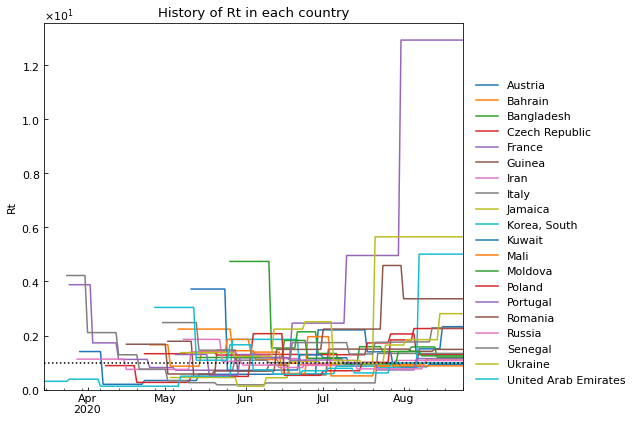

Country,Austria,Bahrain,Bangladesh,Czech Republic,France,Guinea,Iran,Italy,Jamaica,"Korea, South",Kuwait,Mali,Moldova,Poland,Portugal,Romania,Russia,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,,,,,,
2020-08-20,2.33,1.14,1.2,1.3,12.92,1.49,1.08,1.34,5.65,5.01,0.94,0.88,1.25,2.26,1.15,3.36,1.0,2.29,2.81,0.99
2020-08-21,2.33,1.14,1.2,1.3,12.92,1.49,1.08,1.34,5.65,5.01,0.94,0.88,1.25,2.26,1.15,3.36,1.0,2.29,2.81,0.99
2020-08-22,2.33,1.14,1.2,1.3,12.92,1.49,1.08,1.34,5.65,5.01,0.94,0.88,1.25,2.26,1.15,3.36,1.0,2.29,2.81,0.99
2020-08-23,2.33,1.14,1.2,1.3,12.92,1.49,1.08,1.34,5.65,5.01,0.94,0.88,1.25,2.26,1.15,3.36,1.0,2.29,2.81,0.99
2020-08-24,2.33,1.14,1.2,1.3,12.92,1.49,1.08,1.34,5.65,5.01,0.94,0.88,1.25,2.26,1.15,3.36,1.0,2.29,2.81,0.99


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

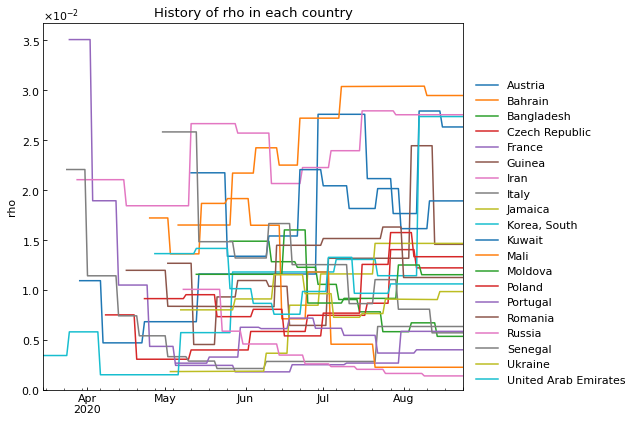

Country,Austria,Bahrain,Bangladesh,Czech Republic,France,Guinea,Iran,Italy,Jamaica,"Korea, South",Kuwait,Mali,Moldova,Poland,Portugal,Romania,Russia,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,,,,,,
2020-08-20,0.02631,0.02946,0.005342,0.0122,0.005842,0.014557,0.027534,0.006329,0.014651,0.027351,0.018906,0.002247,0.011515,0.013316,0.003996,0.011234,0.00138,0.005694,0.009824,0.010593
2020-08-21,0.02631,0.02946,0.005342,0.0122,0.005842,0.014557,0.027534,0.006329,0.014651,0.027351,0.018906,0.002247,0.011515,0.013316,0.003996,0.011234,0.00138,0.005694,0.009824,0.010593
2020-08-22,0.02631,0.02946,0.005342,0.0122,0.005842,0.014557,0.027534,0.006329,0.014651,0.027351,0.018906,0.002247,0.011515,0.013316,0.003996,0.011234,0.00138,0.005694,0.009824,0.010593
2020-08-23,0.02631,0.02946,0.005342,0.0122,0.005842,0.014557,0.027534,0.006329,0.014651,0.027351,0.018906,0.002247,0.011515,0.013316,0.003996,0.011234,0.00138,0.005694,0.009824,0.010593
2020-08-24,0.02631,0.02946,0.005342,0.0122,0.005842,0.014557,0.027534,0.006329,0.014651,0.027351,0.018906,0.002247,0.011515,0.013316,0.003996,0.011234,0.00138,0.005694,0.009824,0.010593


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

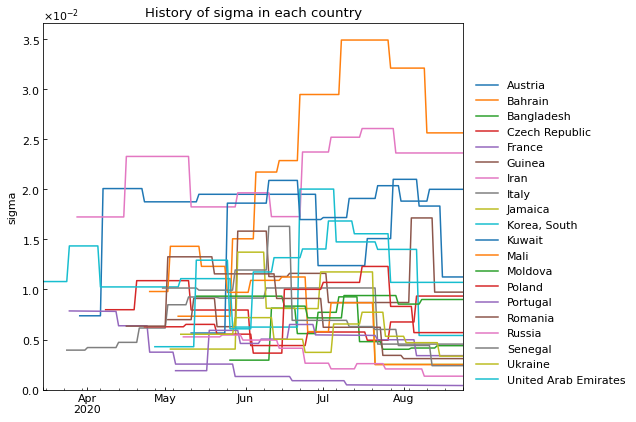

Country,Austria,Bahrain,Bangladesh,Czech Republic,France,Guinea,Iran,Italy,Jamaica,"Korea, South",Kuwait,Mali,Moldova,Poland,Portugal,Romania,Russia,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,,,,,,
2020-08-20,0.011249,0.025626,0.004393,0.009343,0.000415,0.009735,0.02362,0.00455,0.002531,0.005413,0.019995,0.002503,0.009001,0.005697,0.003398,0.003102,0.001349,0.002397,0.003347,0.01071
2020-08-21,0.011249,0.025626,0.004393,0.009343,0.000415,0.009735,0.02362,0.00455,0.002531,0.005413,0.019995,0.002503,0.009001,0.005697,0.003398,0.003102,0.001349,0.002397,0.003347,0.01071
2020-08-22,0.011249,0.025626,0.004393,0.009343,0.000415,0.009735,0.02362,0.00455,0.002531,0.005413,0.019995,0.002503,0.009001,0.005697,0.003398,0.003102,0.001349,0.002397,0.003347,0.01071
2020-08-23,0.011249,0.025626,0.004393,0.009343,0.000415,0.009735,0.02362,0.00455,0.002531,0.005413,0.019995,0.002503,0.009001,0.005697,0.003398,0.003102,0.001349,0.002397,0.003347,0.01071
2020-08-24,0.011249,0.025626,0.004393,0.009343,0.000415,0.009735,0.02362,0.00455,0.002531,0.005413,0.019995,0.002503,0.009001,0.005697,0.003398,0.003102,0.001349,0.002397,0.003347,0.01071


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

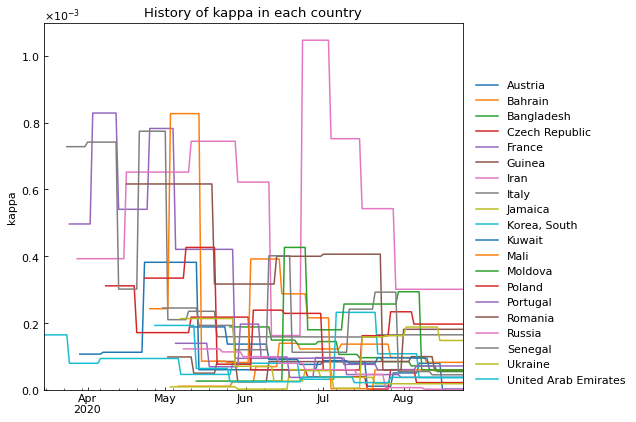

Country,Austria,Bahrain,Bangladesh,Czech Republic,France,Guinea,Iran,Italy,Jamaica,"Korea, South",Kuwait,Mali,Moldova,Poland,Portugal,Romania,Russia,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,,,,,,
2020-08-20,0.000002,0.000082,0.000054,0.000021,0.000037,0.000057,0.000301,0.000164,0.000018,0.000036,0.00006,0.00006,0.000059,0.000196,0.000071,0.000181,0.000001,0.000045,0.000147,0.000037
2020-08-21,0.000002,0.000082,0.000054,0.000021,0.000037,0.000057,0.000301,0.000164,0.000018,0.000036,0.00006,0.00006,0.000059,0.000196,0.000071,0.000181,0.000001,0.000045,0.000147,0.000037
2020-08-22,0.000002,0.000082,0.000054,0.000021,0.000037,0.000057,0.000301,0.000164,0.000018,0.000036,0.00006,0.00006,0.000059,0.000196,0.000071,0.000181,0.000001,0.000045,0.000147,0.000037
2020-08-23,0.000002,0.000082,0.000054,0.000021,0.000037,0.000057,0.000301,0.000164,0.000018,0.000036,0.00006,0.00006,0.000059,0.000196,0.000071,0.000181,0.000001,0.000045,0.000147,0.000037
2020-08-24,0.000002,0.000082,0.000054,0.000021,0.000037,0.000057,0.000301,0.000164,0.000018,0.000036,0.00006,0.00006,0.000059,0.000196,0.000071,0.000181,0.000001,0.000045,0.000147,0.000037


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

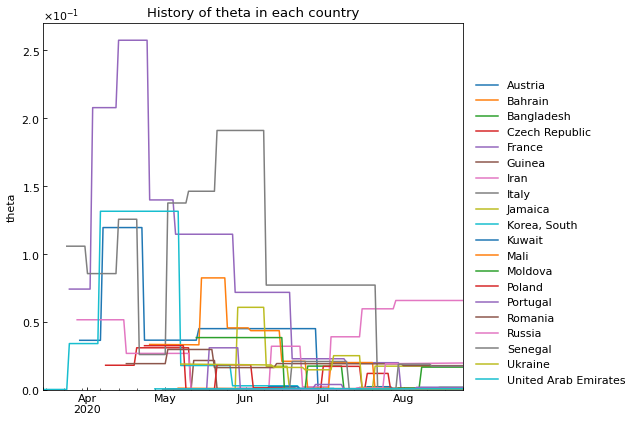

Country,Austria,Bahrain,Bangladesh,Czech Republic,France,Guinea,Iran,Italy,Jamaica,"Korea, South",Kuwait,Mali,Moldova,Poland,Portugal,Romania,Russia,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,,,,,,,
2020-08-20,0.001558,0.001272,0.001674,0.000679,0.000679,0.000164,0.065715,0.000172,0.01733,0.000954,0.000228,0.00041,0.016636,0.000552,0.001718,0.017721,0.019667,0.017265,0.000536,0.000663
2020-08-21,0.001558,0.001272,0.001674,0.000679,0.000679,0.000164,0.065715,0.000172,0.01733,0.000954,0.000228,0.00041,0.016636,0.000552,0.001718,0.017721,0.019667,0.017265,0.000536,0.000663
2020-08-22,0.001558,0.001272,0.001674,0.000679,0.000679,0.000164,0.065715,0.000172,0.01733,0.000954,0.000228,0.00041,0.016636,0.000552,0.001718,0.017721,0.019667,0.017265,0.000536,0.000663
2020-08-23,0.001558,0.001272,0.001674,0.000679,0.000679,0.000164,0.065715,0.000172,0.01733,0.000954,0.000228,0.00041,0.016636,0.000552,0.001718,0.017721,0.019667,0.017265,0.000536,0.000663
2020-08-24,0.001558,0.001272,0.001674,0.000679,0.000679,0.000164,0.065715,0.000172,0.01733,0.000954,0.000228,0.00041,0.016636,0.000552,0.001718,0.017721,0.019667,0.017265,0.000536,0.000663


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20331 entries, 0 to 20596
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 20331 non-null  datetime64[ns]
 1   Country                              20331 non-null  object        
 2   Rt                                   20331 non-null  float64       
 3   theta                                20331 non-null  float64       
 4   kappa                                20331 non-null  float64       
 5   rho                                  20331 non-null  float64       
 6   sigma                                20331 non-null  float64       
 7   School_closing                       20331 non-null  int64         
 8   Workplace_closing                    20331 non-null  int64         
 9   Cancel_events                        20331 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.137381,-0.058998,0.176058,-0.289896,-0.425888,-0.145819,0.016215,0.151633,-0.159887,-0.052684,-0.030190,-0.287744,0.015324,-0.242396,-0.138012,-0.128432
theta,-0.137381,1.000000,0.608806,0.110921,0.196368,0.276315,0.389006,0.158494,-0.144476,-0.025942,-0.040016,0.032519,-0.080490,0.022328,-0.561251,-0.384076,0.277485
kappa,-0.058998,0.608806,1.000000,0.441397,0.251737,0.371746,0.506115,0.115530,0.033255,0.178048,0.122430,0.063087,0.160658,-0.093976,-0.563804,-0.436996,0.472858
rho,0.176058,0.110921,0.441397,1.000000,0.518578,0.176570,0.121836,-0.202876,-0.117717,0.005774,-0.003225,-0.035335,0.195341,-0.133175,-0.319317,-0.312163,0.141434
sigma,-0.289896,0.196368,0.251737,0.518578,1.000000,0.341229,-0.000602,-0.150876,-0.453439,-0.229777,-0.234059,-0.354675,0.189645,-0.170693,-0.212444,-0.052771,-0.060788
School_closing,-0.425888,0.276315,0.371746,0.176570,0.341229,1.000000,0.555293,0.307400,0.023773,0.349233,0.403096,0.166374,0.478829,-0.059256,-0.044212,-0.248182,0.643170
Workplace_closing,-0.145819,0.389006,0.506115,0.121836,-0.000602,0.555293,1.000000,0.423394,0.391378,0.591333,0.593168,0.469105,0.227249,-0.020059,-0.123016,-0.392944,0.810067
Cancel_events,0.016215,0.158494,0.115530,-0.202876,-0.150876,0.307400,0.423394,1.000000,0.542120,0.347310,0.521357,0.344550,-0.024794,-0.022437,0.124352,-0.077475,0.551127
Gatherings_restrictions,0.151633,-0.144476,0.033255,-0.117717,-0.453439,0.023773,0.391378,0.542120,1.000000,0.611993,0.649802,0.598207,0.083694,0.064803,0.296080,-0.091497,0.608251
Transport_closing,-0.159887,-0.025942,0.178048,0.005774,-0.229777,0.349233,0.591333,0.347310,0.611993,1.000000,0.686313,0.816942,0.217499,-0.122424,0.279852,-0.160626,0.761174


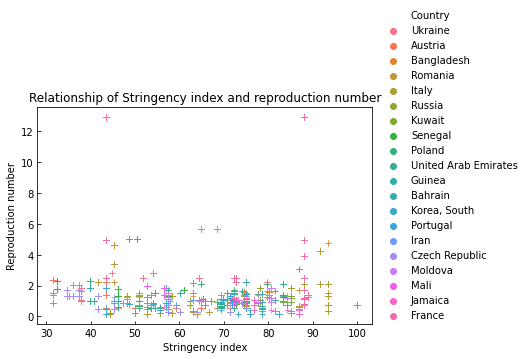

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()